In [532]:
# Data set generation
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, Adagrad, Nadam

# Generate 3 dimensional dataset with 10 classes and 250 elements
def generate_dataset():
    X = []
    y = []
    means = [[3, 3, 3], [5, 5, 5], [7, 7, 7], [9, 9, 9], [1, 1, 1], [2, 2, 2], [4, 4, 4], [6, 6, 6], [8, 8, 8], [0, 0, 0]]
    covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
    for i in range(10):
        X_class = np.random.multivariate_normal(means[i], covs[i], 25)
        X.extend(X_class)
        y.extend([i] * 25)
    return np.array(X), np.array(y)


In [533]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_dataset(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(10):
        X_class = X[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], label='Class {}'.format(i))
    ax.legend()
    plt.show()


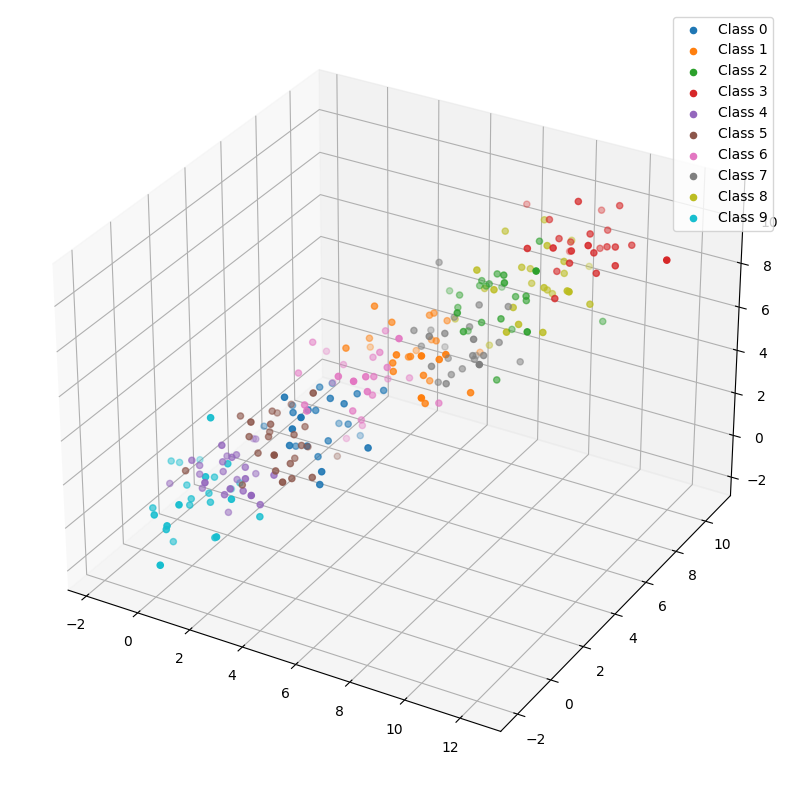

In [534]:
(x, y) = generate_dataset()
plot_dataset(x, y)

In [535]:
# Keras model class
class Classifier:
    def __init__(self, num_layers, neurons_per_layer, activation):
        self.num_layers = num_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation = activation

    def build_model(self, input_shape):
        model = Sequential()
        model.add(Dense(self.neurons_per_layer, activation=self.activation, input_shape=(input_shape,)))
        for i in range(self.num_layers - 1):
            model.add(Dense(self.neurons_per_layer, activation=self.activation))
        model.add(Dense(10, activation='softmax'))
        return model

In [536]:
# Train the model
def train(X, y, model, optimizer, epochs):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X, y, epochs=epochs, verbose=0)
    return history

In [537]:
# Plot the training results
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [538]:
def plot_classification_results(X, y, model):
    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        y_pred_class = y_pred[y == i]
        X_class_3d = np.column_stack((X_class, np.zeros(len(X_class)))) # add a third dimension
        ax.scatter(X_class_3d[:, 0], X_class_3d[:, 1], X_class_3d[:, 2], c=y_pred_class,
                   label='Class {}'.format(i))
    ax.legend()
    plt.show()

In [539]:
def experiment(num_layers=8, neurons_per_layer=512, activation='LeakyReLU', epochs=100):
    X, y = generate_dataset()
    plot_dataset(X, y)

    classifier = Classifier(num_layers, neurons_per_layer, activation)
    model = classifier.build_model(input_shape=3)

    optimizer = Nadam(lr=0.01)
    history = train(X, y, model, optimizer, epochs)
    plot_history(history)

    plot_classification_results(X, y, model)

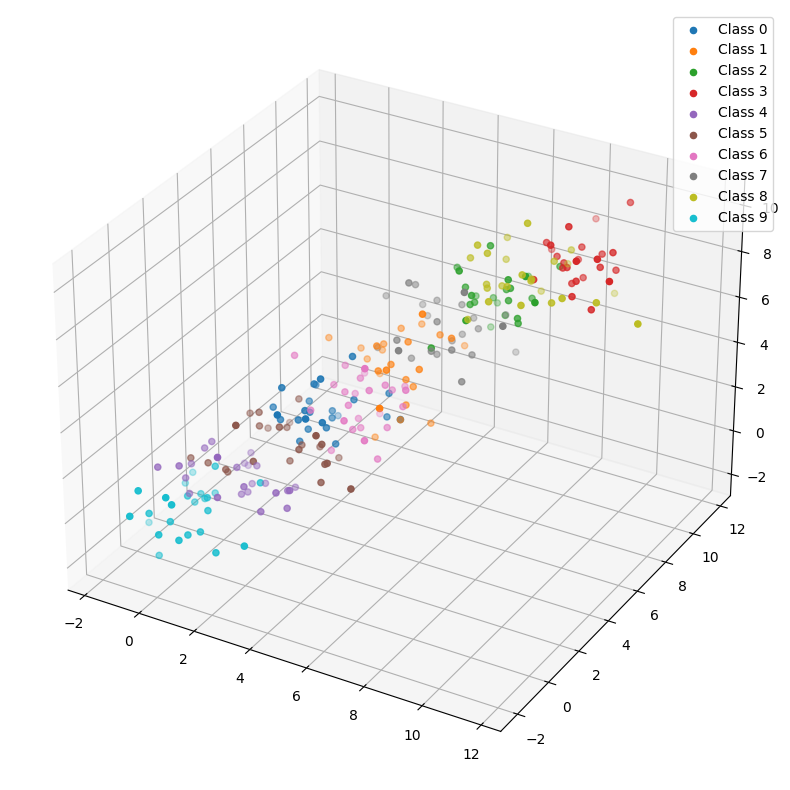

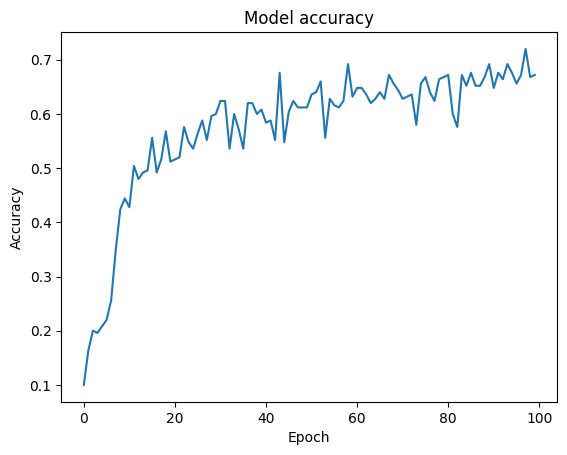

8/8 [==============================] - 0s 3ms/step


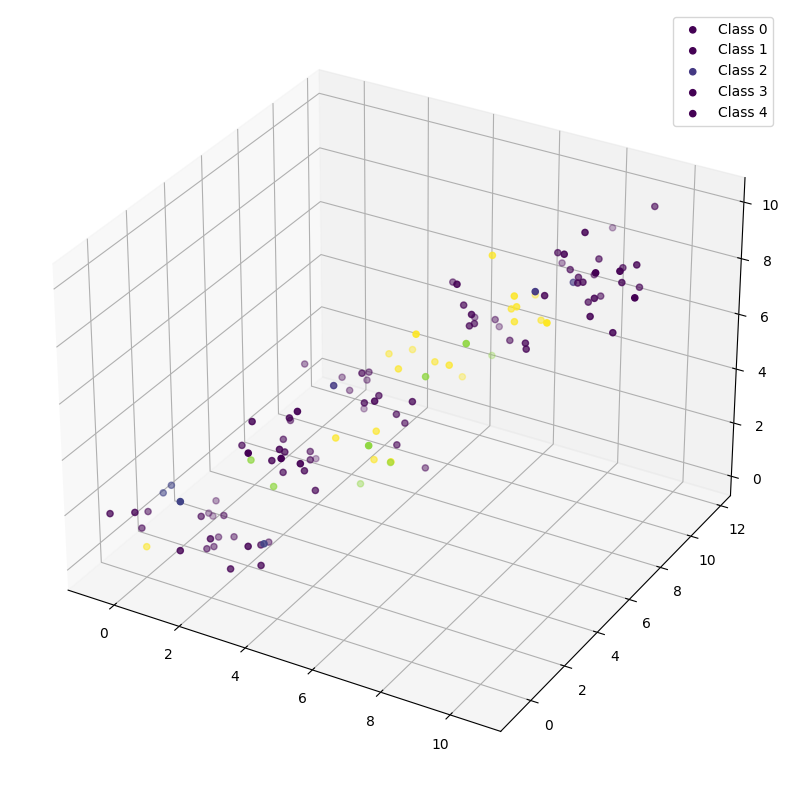

In [540]:
experiment(4, 6)